<a href="https://colab.research.google.com/github/AgilaGovindan/Machine-Learning/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout



In [3]:
from google.colab import drive
drive.mount('/content/drive')
train_dir="/content/drive/MyDrive/dataset/train"
valid_dir="/content/drive/MyDrive/dataset/test"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setting the parameter


In [ ]:
num_classes=15
image_size=(224,224,3)
Batch_size=32
epoch=5
learning_rate=0.001

Preprocessing and agument the training data

In [ ]:
train_datagen =ImageDataGenerator(
    rescale=1./ 255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Preprocessing validatiom data

In [ ]:
valid_datagen=ImageDataGenerator(rescale=1./255)

load the inceptionv3 model

In [ ]:
img_height,img_width=224,224
base_model=InceptionV3(weights="imagenet",include_top=False,input_shape = (img_width, img_height, 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Adding top layer for the model

In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1944,activation="relu")(x)
prediction=Dense(num_classes,activation="softmax")(x)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),  # Batch normalization to stabilize training
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),  # Batch normalization
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Combine basemodel with top model

In [ ]:
model = Model(inputs=base_model.input, outputs=prediction)


SyntaxError: incomplete input (<ipython-input-25-89fd3cab5c54>, line 2)

Freeze the base model

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

compile model

In [ ]:
model.compile(optimizer='adam', loss='sparse categorical_crossentropy', metrics=['accuracy'])

Generate the training data from directiories

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),  # Resize images to match the input size of the model
    batch_size=32,                        # Number of samples per batch
    class_mode='categorical',             # For multi-class classification
)
# Flow validation data from directory
validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_width, img_height),  # Resize images to match the input size of the model
    batch_size=32,                        # Number of samples per batch
    class_mode='categorical',             # For multi-class classification
    shuffle=False                         # Don't shuffle the validation data
)

Found 1944 images belonging to 15 classes.
Found 1944 images belonging to 15 classes.


Train the model

In [ ]:
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=len(train_generator) // train_generator.batch_size,  # Steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,  # Validation data generator
    validation_steps=len(validation_generator) // validation_generator.batch_size,  # Validation steps
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 86s 86s/step - accuracy: 0.0625 - loss: 2.9784 - val_accuracy: 0.0000e+00 - val_loss: 5.4493
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2188 - loss: 4.8258 - val_accuracy: 0.4688 - val_loss: 2.0130
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.4688 - loss: 3.0508 - val_accuracy: 0.7188 - val_loss: 1.1829
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5938 - loss: 2.6309 - val_accuracy: 0.9062 - val_loss: 0.3896
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.4375 - loss: 4.7296 - val_accuracy: 1.0000 - val_loss: 0.0568
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.3438 - loss: 4.3039 - val_accuracy: 0.9062 - val_loss: 0.2955
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.4375 - loss: 2.9234 - val_accuracy: 0.8750 - val_loss: 0.5464
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5312 - loss: 3.8529 - val_accuracy: 0.9062 - val_loss: 0.440

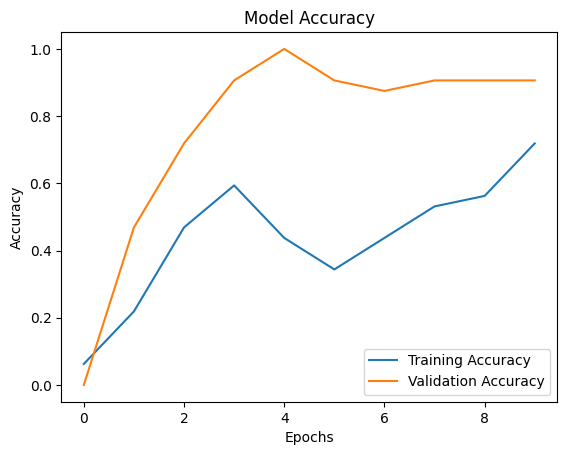

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


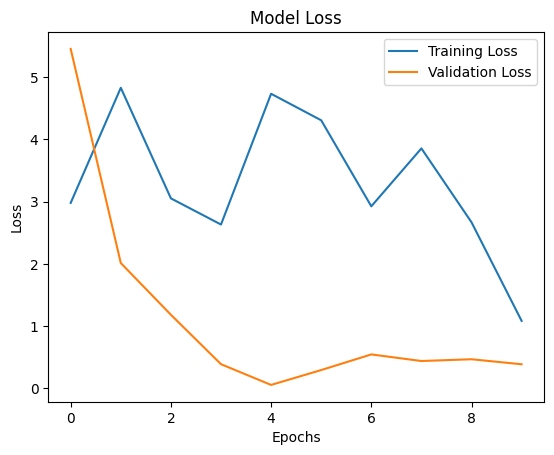

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=len(train_generator), verbose=1)

print(f'Training Loss: {train_loss}')
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

61/61 ━━━━━━━━━━━━━━━━━━━━ 541s 9s/step - accuracy: 0.7107 - loss: 1.3075
Training Loss: 1.3369266986846924
Training Accuracy: 70.22%
